In [1]:
from torchvision import datasets

In [2]:
train_dataset = datasets.FashionMNIST(
    root = './fashion_mnist',
    train = True,
    download = True,
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.31MB/s]


Extracting ./fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 140kB/s]


Extracting ./fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.54MB/s]


Extracting ./fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.69MB/s]

Extracting ./fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST/raw



In [3]:
test_dataset = datasets.FashionMNIST(
    root = './fashion_mnist',
    train = False,
    download = True,
)

In [4]:
print(f'학습 데이터 개수: {len(train_dataset)}')
print(f'테스트 데이터 개수: {len(test_dataset)}')

학습 데이터 개수: 60000
테스트 데이터 개수: 10000


In [5]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [8]:
import matplotlib.pyplot as plt

def visualize_data(image, label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  plt.figure(figsize=(1,1))
  plt.imshow(image, cmap='gray')
  plt.title(f'Label: {class_names[label]}')
  plt.show()

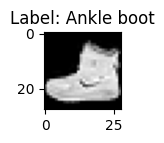

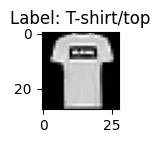

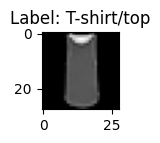

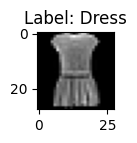

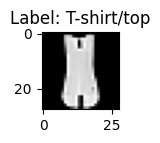

In [9]:
for i in range(5):
  image = train_dataset[i][0]
  label = train_dataset[i][1]
  visualize_data(image, label)

In [20]:
from torchvision.transforms import v2
import torch
import numpy as np

In [11]:
image_pil = train_dataset[0][0]

In [14]:
np.array(image_pil)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [16]:
to_image = v2.ToImage()
image_tensor = to_image(image_pil)
type(image_tensor)

torchvision.tv_tensors._image.Image

In [17]:
image_tensor.size()

torch.Size([1, 28, 28])

In [18]:
image_tensor

Image([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [21]:
to_dtype = v2.ToDtype(dtype = torch.float32, scale = True)
image_tensor_float = to_dtype(image_tensor)

In [22]:
image_tensor_float

Image([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [23]:
transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype = torch.float32, scale = True)
    ]
)

In [24]:
image_tensor_compose = transforms(image_pil)

In [25]:
all_pixels = torch.cat([transforms(image) for image, label in train_dataset])
mean = all_pixels.mean().item()
std = all_pixels.std().item()

print(f'평균: {mean}')
print(f'표준편차: {std}')

평균: 0.28604060411453247
표준편차: 0.35302427411079407


In [27]:
transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype = torch.float32, scale = True),
        v2.Normalize(mean = [mean], std = [std])
    ]
)

In [28]:
train_dataset = datasets.FashionMNIST(
    root = './fashion_mnist',
    train = True,
    download = True,
    transform = transforms
)

test_dataset = datasets.FashionMNIST(
    root = './fashion_mnist',
    train = False,
    download = True,
    transform = transforms
)

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [30]:
conv_layer = nn.Conv2d(
    in_channels = 3,
    out_channels = 32,
    kernel_size = 3,
    stride = 1,
    padding = 0, # 'valid', 'same'
)

In [31]:
x = torch.randn(2, 3, 28, 28)
y = conv_layer(x)
y.size()

torch.Size([2, 32, 26, 26])

In [32]:
maxpool_layer=nn.MaxPool2d(
    kernel_size = 2,
    stride = 2,
    padding = 0,
)

In [33]:
avgpool_layer=nn.AvgPool2d(
    kernel_size = 2,
    stride = 2,
    padding = 0,
)

In [34]:
x = torch.randn(2,3,28,28)
y = maxpool_layer(x)
y.size()

torch.Size([2, 3, 14, 14])

In [35]:
y = F.max_pool2d(x, kernel_size = 4)
y.size()

torch.Size([2, 3, 7, 7])

In [39]:
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
    self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
    self.maxpool = nn.MaxPool2d(2,2)
    self.dropout = nn.Dropout(0.2)
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(3136, 64)
    self.linear2 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.maxpool(x)
    x = F.relu(self.conv2(x))
    x = self.maxpool(x)
    x = self.dropout(x)
    x = self.flatten(x)
    x = F.relu(self.linear1(x))
    output = self.linear2(x)
    return output

In [40]:
model = CNNModel()
x = torch.randn(2, 1, 28, 28)
model(x)

tensor([[ 0.1335,  0.0773, -0.0260,  0.1599, -0.0834, -0.2177,  0.1008,  0.2076,
         -0.2395, -0.1978],
        [ 0.1187,  0.0458,  0.0056,  0.0753, -0.0992, -0.0621,  0.0300,  0.0267,
         -0.1021, -0.1220]], grad_fn=<AddmmBackward0>)

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision.transforms import v2
from torch.utils.data import DataLoader

In [42]:
transforms_train = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=28),
        v2.RandomRotation(degrees=10),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353]),
    ]
)

transforms_test = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353]),
    ]
)

train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
    transform=transforms_train,
)

test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
    transform=transforms_test,
)

from torch.utils.data import random_split
val_dataset, test_dataset = random_split(test_dataset, [5000, 5000])

train_dataloader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, drop_last=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32)

In [43]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.maxpool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.2)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(3136, 64)
        self.linear2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.dropout(x)
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        output = self.linear2(x)

        return output


model = CNNModel()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=3136, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=10, bias=True)
)

In [44]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [45]:
def evaluate(dataloader, model, loss_fn):
    model.eval()
    losses = []
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            preds = model(inputs) # [배치 크기, 클래스 개수]

            loss = loss_fn(preds, labels)
            losses.append(loss.item())

            pred_labels = torch.argmax(preds, dim=1) # [배치 크기]
            correct += (pred_labels == labels).sum().item()
            total += len(preds)

    avg_loss = sum(losses) / len(losses)
    acc = correct / total

    return avg_loss, acc

In [46]:
epochs = 5
step = 0
for epoch in range(epochs):
    model.train()
    for train_batch in train_dataloader:
        inputs = train_batch[0].to(device)
        labels = train_batch[1].to(device)
        preds = model(inputs)
        loss = loss_fn(preds, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        step += 1
        if step % 100 == 0:
            print(f'step {step}, train loss: {loss.item():.4f}')

    val_loss, val_acc = evaluate(val_dataloader, model, loss_fn)
    print(f'epoch {epoch+1}/{epochs}, val loss: {val_loss:.4f}, val acc: {val_acc:.4f}')

print('Training finished!')

step 100, train loss: 1.1852
step 200, train loss: 1.0749
step 300, train loss: 0.8919
step 400, train loss: 1.0581
epoch 1/5, val loss: 0.5998, val acc: 0.7900
step 500, train loss: 0.9883
step 600, train loss: 0.9661
step 700, train loss: 0.9024
step 800, train loss: 0.9848
step 900, train loss: 0.9419
epoch 2/5, val loss: 0.4833, val acc: 0.8242
step 1000, train loss: 0.9693
step 1100, train loss: 0.7725
step 1200, train loss: 0.7735
step 1300, train loss: 0.7234
step 1400, train loss: 0.9642
epoch 3/5, val loss: 0.4847, val acc: 0.8244
step 1500, train loss: 0.7225
step 1600, train loss: 0.8782
step 1700, train loss: 0.9320
step 1800, train loss: 0.7011
epoch 4/5, val loss: 0.4390, val acc: 0.8424
step 1900, train loss: 0.8113
step 2000, train loss: 0.7355
step 2100, train loss: 0.8160
step 2200, train loss: 0.7916
step 2300, train loss: 0.7418
epoch 5/5, val loss: 0.4094, val acc: 0.8512
Training finished!


In [47]:
test_loss, test_acc = evaluate(test_dataloader, model, loss_fn)
test_acc

0.8588